# ZOO CLASSIFICATION

Data Zoo CLassification didapatkan dari Kaggle dimana pada data diketahui variabel-variabelnya seperti
animal_name,hair,features,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize sebagai variabel prediktornya
dan class_type sebagai variabel responnya

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
data = pd.read_excel (r'D:\Zooo.xlsx', sheet_name='zoo')

In [89]:
data.shape

(61, 18)

In [90]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [91]:
data.tail()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
56,vole,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
57,vulture,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
58,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
59,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
60,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


Data Exploration

In [228]:
import pandas as pd

In [237]:
df= pd.read_excel (r'D:\Zooo.xlsx')
df.columns=['animal_name','hair','features','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','class_type']

In [238]:
df.head()

,animal_name,hair,features,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 18 columns):
animal_name    61 non-null object
hair           61 non-null int64
features       61 non-null int64
eggs           61 non-null int64
milk           61 non-null int64
airborne       61 non-null int64
aquatic        61 non-null int64
predator       61 non-null int64
toothed        61 non-null int64
backbone       61 non-null int64
breathes       61 non-null int64
venomous       61 non-null int64
fins           61 non-null int64
legs           61 non-null int64
tail           61 non-null int64
domestic       61 non-null int64
catsize        61 non-null int64
class_type     61 non-null int64
dtypes: int64(17), object(1)
memory usage: 8.7+ KB


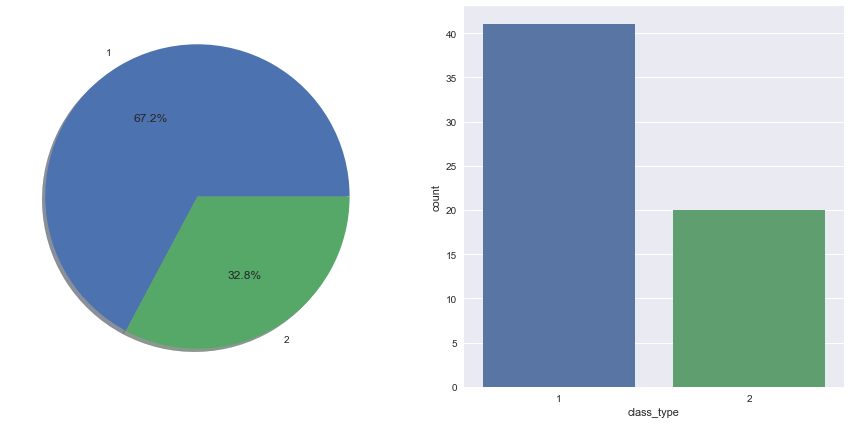

In [241]:
f,ax=plt.subplots(1,2,figsize=(15,7))
df['class_type'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot('class_type',data=df,ax=ax[1])
plt.show()

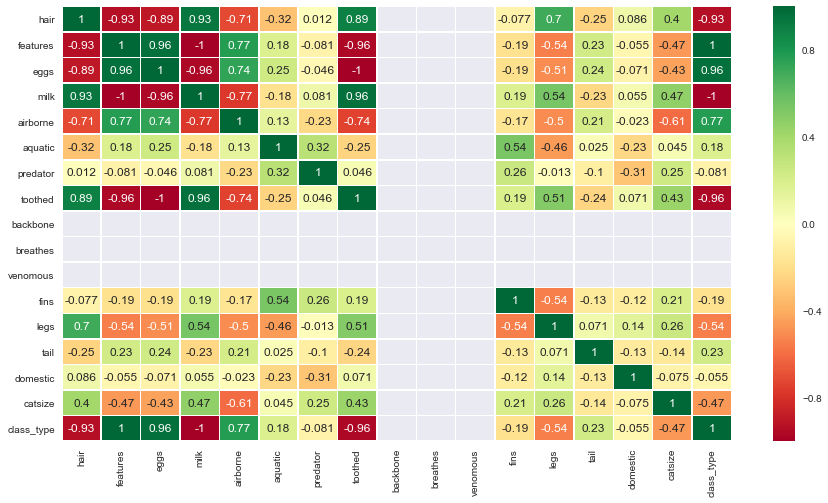

In [242]:
sns.heatmap(df.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

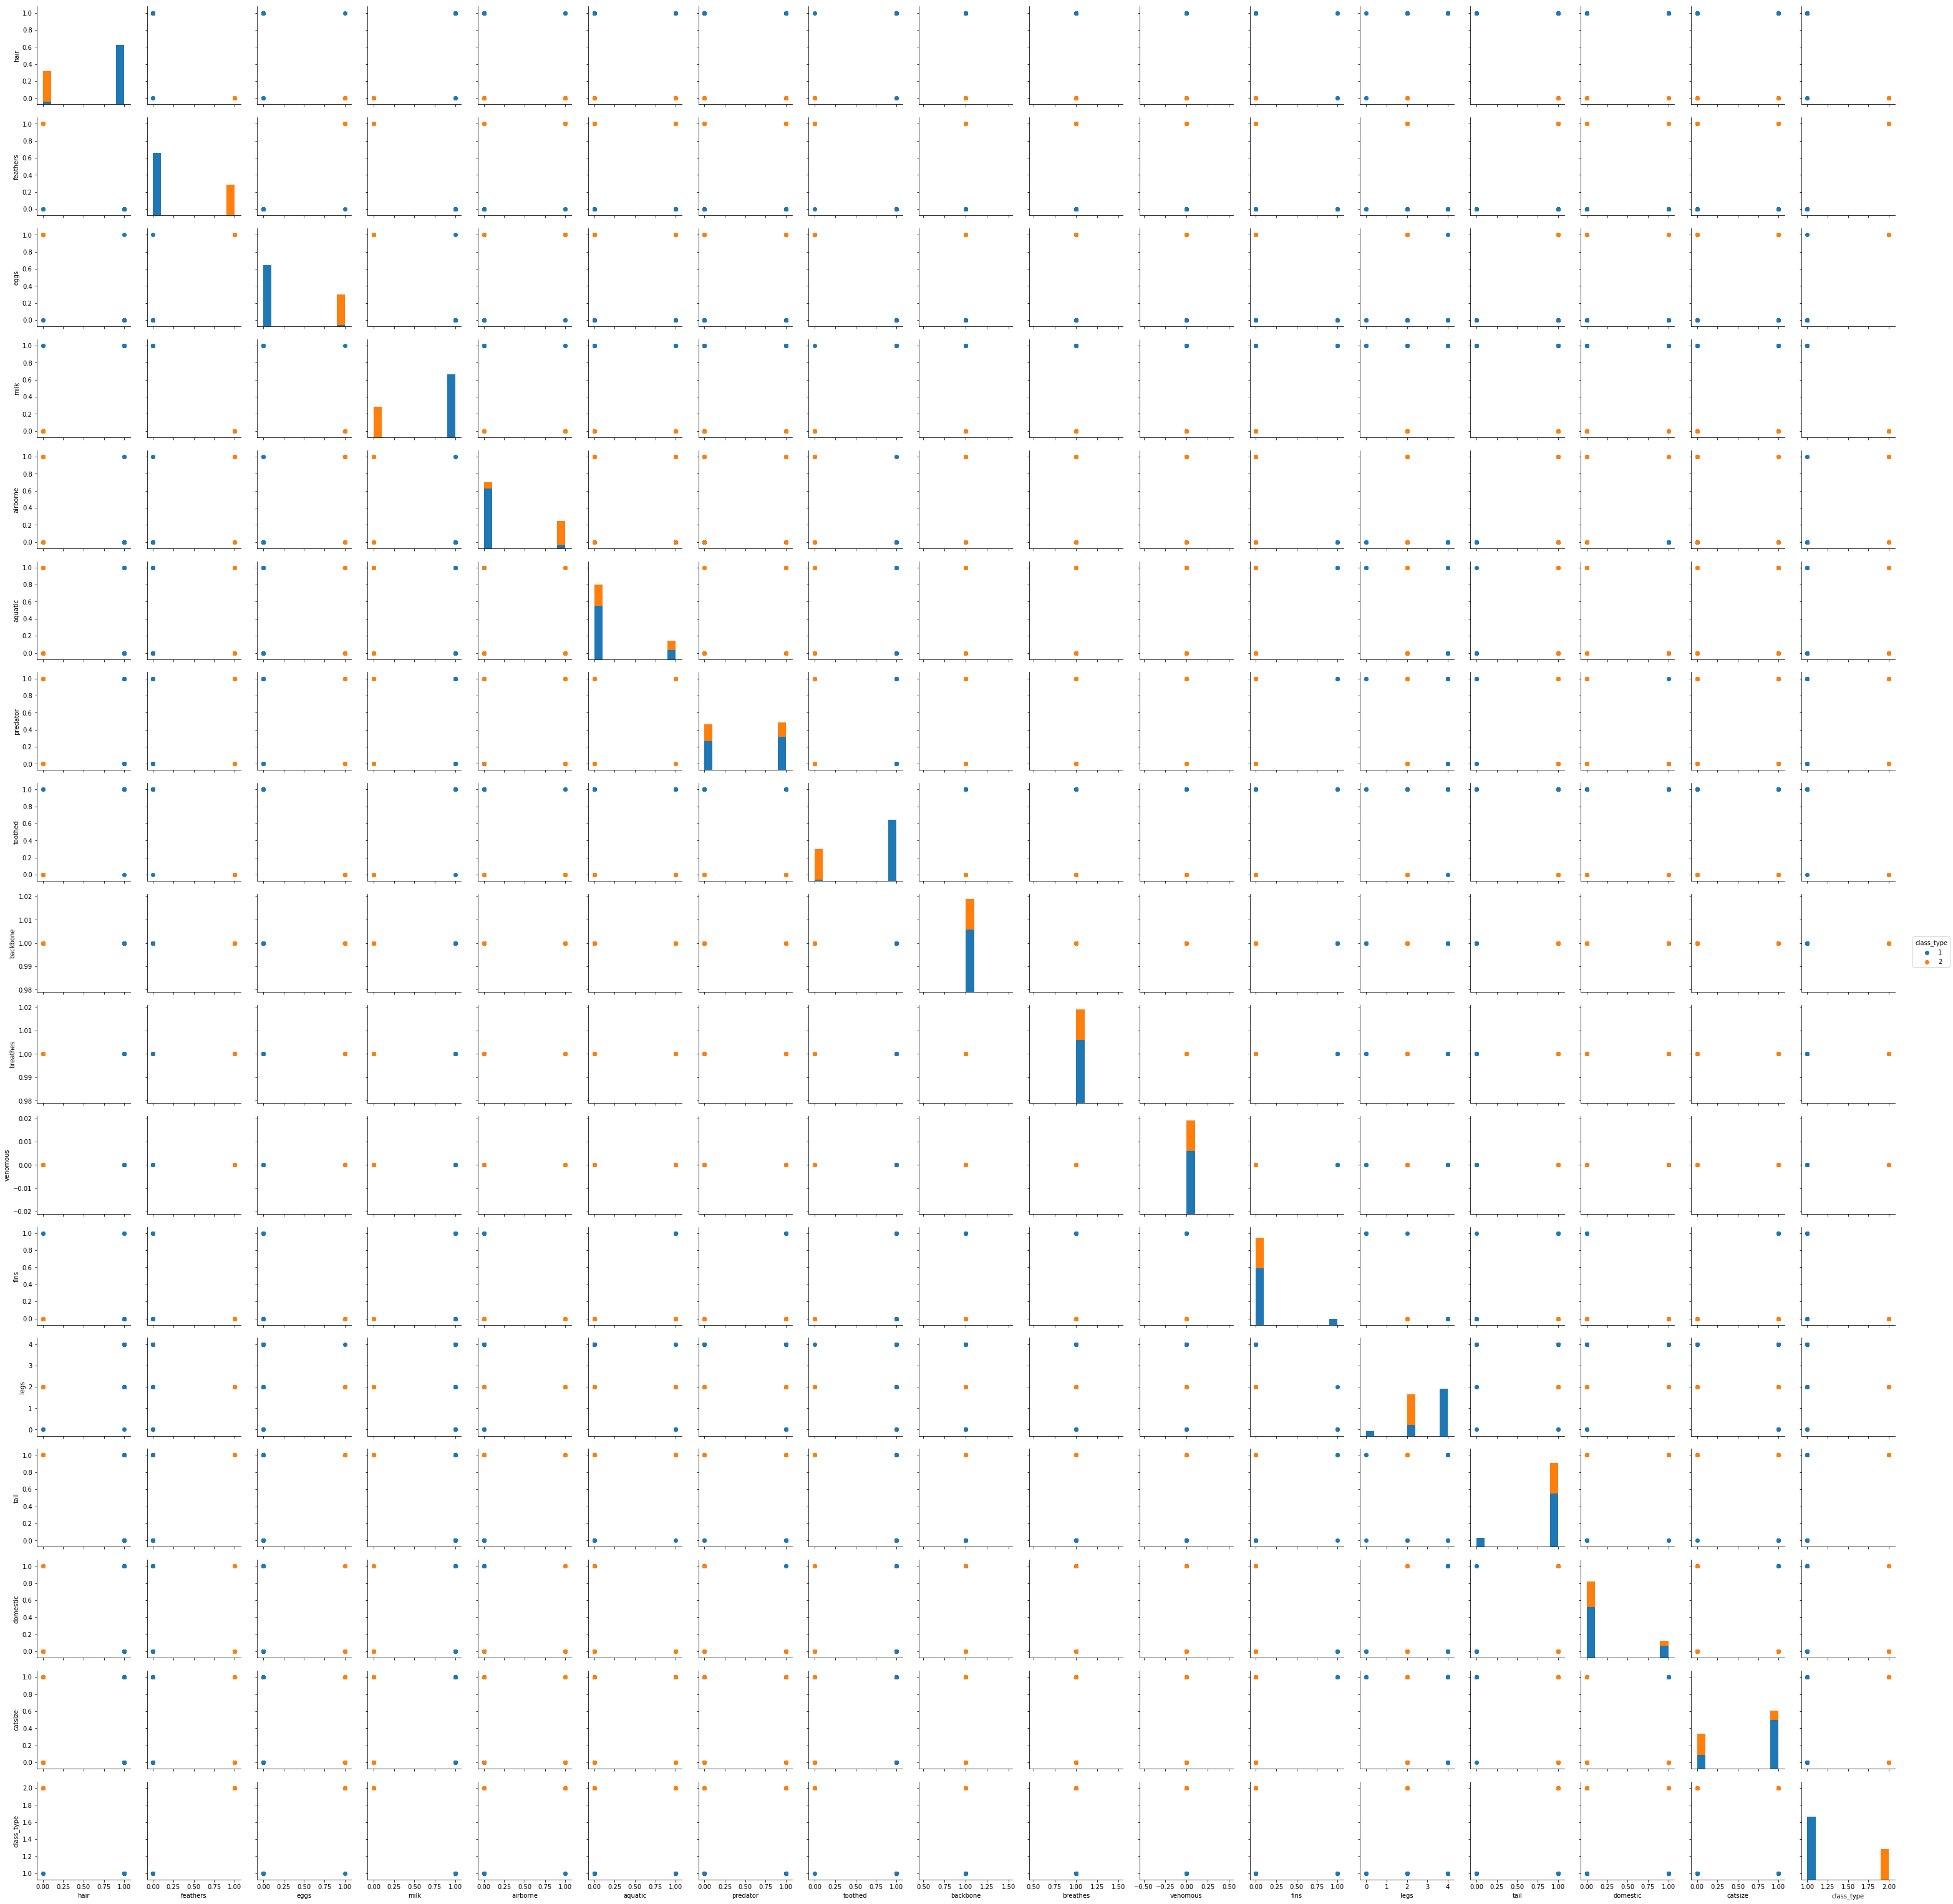

In [109]:
g = sns.PairGrid(data, hue="class_type")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

Train Test Split 

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
y = data['class_type']
X = data.drop(['class_type','animal_name'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

KNN Classifier

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [114]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [115]:
knn.score(X_train, y_train)

1.0

Test Prediction

In [116]:
y_predict = knn.predict(X_test)

In [117]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, auc, roc_curve

In [118]:
conf_matrix = confusion_matrix(y_test, y_predict)
print(conf_matrix)

[[9 0]
 [0 4]]


In [119]:
Class = data['class_type'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrix, columns=Class, index=Class)

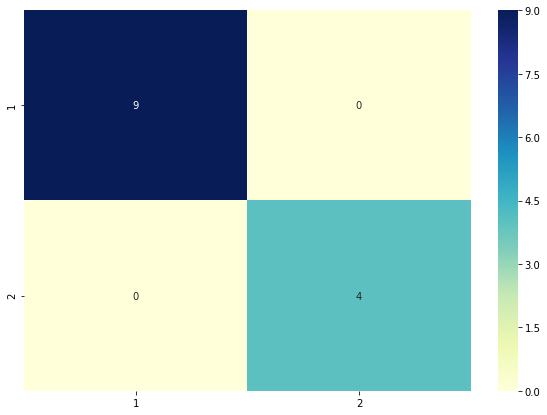

In [120]:
sns.heatmap(conf_matrix_df, annot=True, cmap="YlGnBu")
plt.show()

In [121]:
conf_matrix_df

,1,2
1,9,0
2,0,4


In [122]:
accuracy_score(y_test, y_predict)

1.0

In [123]:
akurasi=accuracy_score(y_test, y_predict)
presisi=precision_score(y_test, y_predict)
recalls=recall_score(y_test, y_predict)

In [124]:
print(akurasi)
print(presisi)
print(recalls)

1.0
1.0
1.0


In [125]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict,  pos_label=2)
auc = metrics.auc(fpr, tpr)
print('auc =', auc)

auc = 1.0


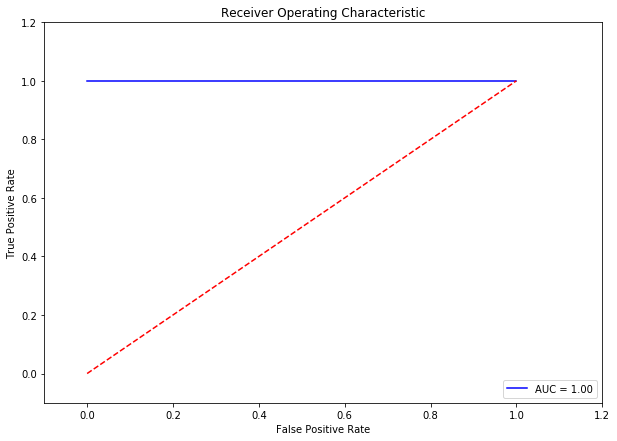

In [126]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b' ,
label='AUC = %0.2f'% auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Naive Bayes

In [127]:
from sklearn.naive_bayes import GaussianNB

In [128]:
nb= GaussianNB()

In [129]:
nb.fit(X_train, y_train)

GaussianNB(priors=None)

In [130]:
nb.score(X_train, y_train)

1.0

In [131]:
ynb_predict=nb.predict(X_test)

In [132]:
ynb_proba=nb.predict_proba(X_test)

In [133]:
conf_matrixnb = confusion_matrix(y_test, ynb_predict)
print(conf_matrixnb)

[[9 0]
 [0 4]]


In [134]:
Class= data['class_type'].unique()
conf_matrix_df = pd.DataFrame(data=conf_matrixnb, columns=Class, index=Class)

In [135]:
conf_matrix_df

,1,2
1,9,0
2,0,4


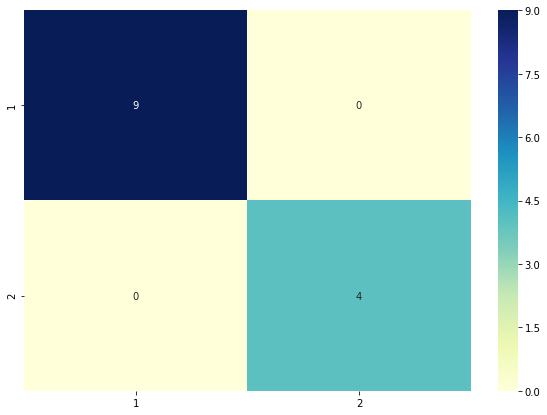

In [136]:
sns.heatmap(conf_matrix_df, annot=True, cmap="YlGnBu")
plt.show()

In [137]:
akurasinb=accuracy_score(y_test, ynb_predict)
presisinb=precision_score(y_test, ynb_predict)
recallsnb=recall_score(y_test,ynb_predict)

In [138]:
print(akurasinb)
print(presisinb)
print(recallsnb)

1.0
1.0
1.0


In [139]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import math

In [140]:
#clf = svm.SVC()
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [141]:
clf.score(X_test,y_test)

0.9230769230769231

In [142]:
clf.predict(X_test[10:15])

array([2, 1, 1], dtype=int64)

In [143]:
y_test[10:15] #model predict correctly with accuracy of 88% using SVM but using decison tree clasifier the accurary 

26    2
27    1
55    1
Name: class_type, dtype: int64

# Decision Tree

In [144]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, \
                        AdaBoostClassifier, GradientBoostingClassifier
pylab.rcParams['figure.figsize'] = (10, 7)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [145]:
data = pd.read_excel (r'D:\Zooo.xlsx', index_col ='animal_name')
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
animal_name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [146]:
data.shape

(61, 17)

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, aardvark to wren
Data columns (total 17 columns):
hair          61 non-null int64
feathers      61 non-null int64
eggs          61 non-null int64
milk          61 non-null int64
airborne      61 non-null int64
aquatic       61 non-null int64
predator      61 non-null int64
toothed       61 non-null int64
backbone      61 non-null int64
breathes      61 non-null int64
venomous      61 non-null int64
fins          61 non-null int64
legs          61 non-null int64
tail          61 non-null int64
domestic      61 non-null int64
catsize       61 non-null int64
class_type    61 non-null int64
dtypes: int64(17)
memory usage: 8.6+ KB


Data Exploration

In [148]:
data['class_type'].value_counts()

1    41
2    20
Name: class_type, dtype: int64

In [149]:
data['class_type'].value_counts(normalize=True)

1    0.672131
2    0.327869
Name: class_type, dtype: float64

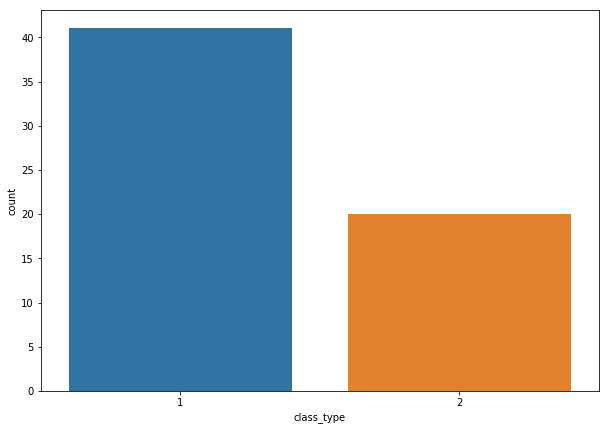

In [150]:
sns.countplot(x=data.class_type)
plt.show()

Matrix Plot

Categorical Variable Encode

Train Test Split

In [151]:
y = data['class_type']
x = data.drop(['class_type'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 123)

Decision Tree Classifier

In [152]:
DecisionTree = DecisionTreeClassifier(random_state=123)
DecisionTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

In [153]:
DecisionTree.score(x_train, y_train)

1.0

In [154]:
DecisionTree.score(x_test, y_test)

0.9375

Bagging

In [159]:
Bagging = BaggingClassifier(random_state=123)
Bagging.fit(x_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=123,
         verbose=0, warm_start=False)

In [160]:
Bagging.score(x_train, y_train)

1.0

In [161]:
Bagging.score(x_test, y_test)

1.0

Random Forest

In [162]:
RF = RandomForestClassifier(random_state=123)
RF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [163]:
RF.score(x_train, y_train)

1.0

In [164]:
RF.score(x_test, y_test)

1.0

Gradient Boosting

In [165]:
GB = GradientBoostingClassifier(random_state=123)
GB.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False)

In [166]:
GB.score(x_train, y_train)

1.0

In [167]:
GB.score(x_test, y_test)

0.9375

Adaptive Boosting

In [168]:
AB = AdaBoostClassifier(random_state=123)
AB.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=123)

In [169]:
AB.score(x_train, y_train)

1.0

In [170]:
AB.score(x_test, y_test)

1.0

Model Tunning

Decision Tree

In [171]:
def GridSearch(x, y, model, parameters):
    clf = GridSearchCV(model, parameters, scoring='accuracy', n_jobs=-1, cv=5, verbose=1)
    clf.fit(x, y)
    print("Best Score: "+str(clf.best_score_))
    print("Best Params: "+str(clf.best_params_))
    return (clf)

In [172]:
ListParams = {
    'criterion': ['gini','entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['auto','sqrt','log2',None],
    'max_depth':[3,6,9],
    'class_weight':['balanced', None]
}

BestDecisionTree = GridSearch(x_train, y_train, DecisionTreeClassifier(random_state=123), ListParams)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   26.9s


Best Score: 1.0
Best Params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'splitter': 'best'}


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   27.9s finished


In [173]:
BestDecisionTree.score(x_train, y_train)

1.0

In [174]:
BestDecisionTree.score(x_test, y_test)

0.9375

In [175]:
BestDecisionTree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, random_state=123, splitter='random')
BestDecisionTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='random')

In [201]:
from sklearn.tree import export_graphviz
import graphviz

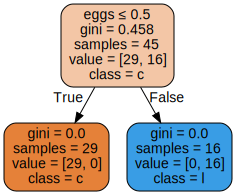

In [207]:
dot_data = export_graphviz(DecisionTree, out_file=None, feature_names=['hair','features','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize'], class_names=('class_type'), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [208]:
# Create DOT data
dot_data = export_graphviz(BestDecisionTree, out_file=None, filled=True, rounded=True, special_characters=True)

In [209]:
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data) 

# Random Forest

In [179]:
ListParams = {
    'n_estimators': [50, 75, 100, 200],
    'max_depth':[1, 5, 10, 15, 20, 25, 30],
    'min_samples_leaf' : [1, 2, 4, 6, 8, 10],
    'max_features': [0.1, 'sqrt', 'log2', None]
}

BestRF = GridSearch(x_train, y_train, RandomForestClassifier(random_state=123), ListParams)

Fitting 5 folds for each of 672 candidates, totalling 3360 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   47.5s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 3360 out of 3360 | elapsed:  6.2min finished


Best Score: 1.0
Best Params: {'max_depth': 1, 'max_features': 0.1, 'min_samples_leaf': 1, 'n_estimators': 50}


In [180]:
RF

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [181]:
BestRF.score(x_train, y_train)

1.0

In [182]:
BestRF.score(x_test, y_test)

1.0

Adaptive Boosting

In [183]:
ListParams = {
    'n_estimators': [50, 75, 100, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'algorithm' : ['SAMME', 'SAMME.R']
}

BestAB = GridSearch(x_train, y_train, AdaBoostClassifier(random_state=123), ListParams)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   26.7s


Best Score: 1.0
Best Params: {'algorithm': 'SAMME', 'learning_rate': 0.001, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   27.1s finished


In [184]:
AB

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=123)

In [185]:
BestAB.score(x_train, y_train)

1.0

In [186]:
BestAB.score(x_test, y_test)

1.0

Gradient Boosting

In [187]:
ListParams = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [50, 75, 100, 200],
    'max_depth':[3, 5, 7],
    'subsample': [0.5, 0.75, 1],
    'max_features': [0.1, 'sqrt', 'log2', None]
}

BestGB = GridSearch(x_train, y_train, GradientBoostingClassifier(random_state=123), ListParams)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 1508 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2408 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 3508 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  3.2min finished


Best Score: 1.0
Best Params: {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 3, 'max_features': 0.1, 'n_estimators': 50, 'subsample': 0.5}


In [188]:
BestGB.score(x_train, y_train)

1.0

In [189]:
BestGB.score(x_test, y_test)

1.0

# SVM

In [218]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
sns.set()

In [219]:
from sklearn.svm import SVC

In [220]:
data = pd.read_excel (r'D:\Zooo.xlsx', index_col ='animal_name')
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
animal_name,,,,,,,,,,,,,,,,,
aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [221]:
svc= SVC()

In [222]:
from sklearn.model_selection import train_test_split

In [223]:
y = data['class_type']
X = data.drop(['class_type'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

In [224]:
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [225]:
svc.score(X_train, y_train)

1.0

In [226]:
y_predict = svc.predict(X_test)

Generated Sample